<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Employee Retention</h1>
<hr>

For this project:
* The dataset has 14249 observations for past/present employees.
* The observations span 12 different departments.
* Each observation includes the employee’s current **employment status**.

We have the following features:

**Target variable**
* 'status' – Current employment status (Employed / Left)

**Administrative information**
* 'department' – Department employees belong(ed) to
* 'salary' – Salary level relative to rest of their department
* 'tenure' – Number of years at the company
* 'recently_promoted' – Was the employee promoted in the last 3 years?

**Workload information**
* 'n_projects' – Number of projects employee is staffed on
* 'avg_monthly_hrs' – Average number of hours worked per month

**Mutual evaluation information**
* 'satisfaction' – Score for employee’s satisfaction with the company (higher is better)
* 'last_evaluation' – Score for most recent evaluation of employee (higher is better)
* 'filed_complaint' – Has the employee filed a formal complaint in the last 3 years?

In [19]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

## Exploratory Analyis

In [20]:
# Load employee data from CSV
df = pd.read_csv('project_files/employee_data.csv')

In [21]:
df.shape

(14249, 10)

In [22]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [23]:
df.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [24]:
# df.dtypes[df.dtypes=='object']

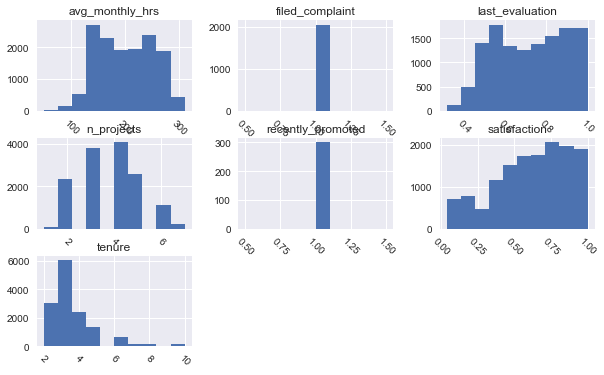

In [27]:
df.hist(figsize=(10,6),xrot=-45)
plt.show()

In [28]:
df.describe()
# df.describe(exclude=['object'])

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [29]:
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


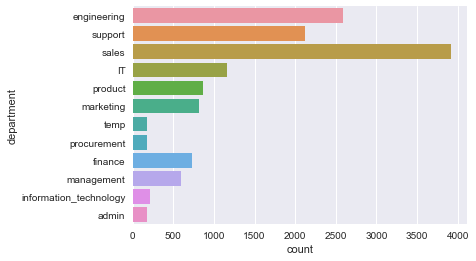

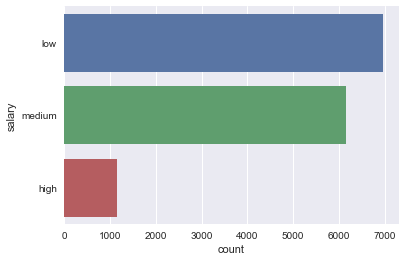

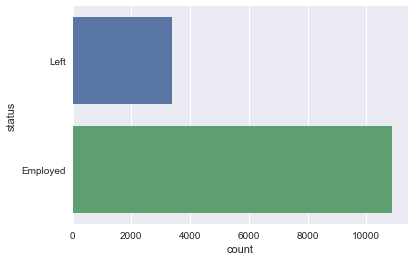

In [57]:
# Seaborn's countplot
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=feature,data=df)
    plt.show()

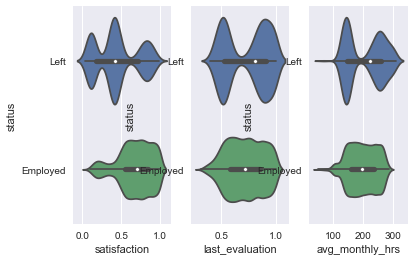

In [58]:
f, axes = plt.subplots(1, 3)
sns.violinplot(y='status',x='satisfaction',data=df, ax=axes[0]) # Outcome: status 
sns.violinplot(y='status',x='last_evaluation',data=df, ax=axes[1])
sns.violinplot(y='status',x='avg_monthly_hrs',data=df, ax=axes[2])

In [39]:
df.groupby('status').mean()
#df.groupby('status').agg(['mean','std'])

# Need replace "filed_complaint" & "recently_promoted" as dummy

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


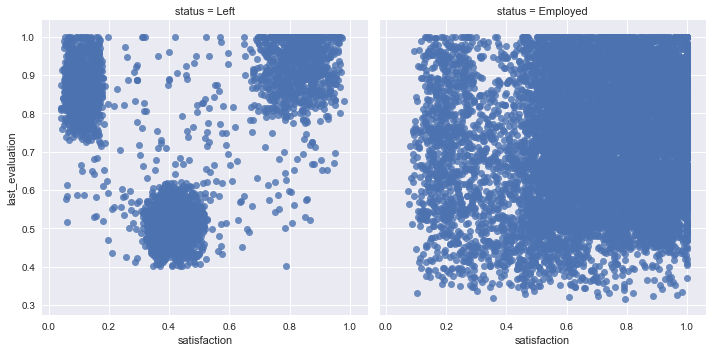

In [52]:
#sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df,fit_reg=False)
#sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df[df.status=='Left'],fit_reg=False)
sns.lmplot(x="satisfaction", y="last_evaluation", col="status", data=df, fit_reg=False)

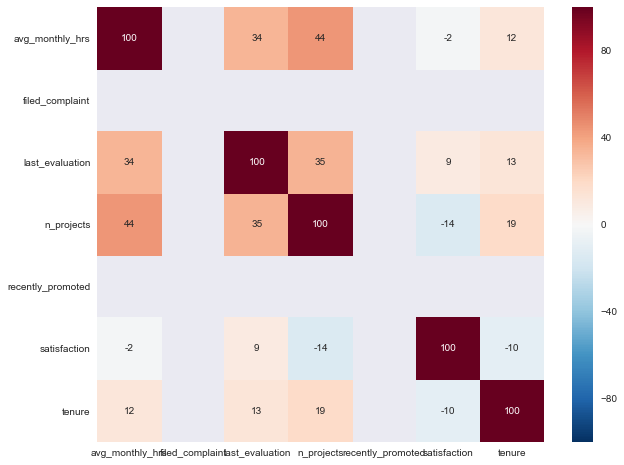

In [59]:
correlations=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlations*100, annot=True, fmt='.0f') #.of to format to a whole number

In [60]:
# Drop Duplicates
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(14249, 10)
(14221, 10)


In [61]:
#df['department']=df.department.fillna(0)
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [62]:
df=df[df.department!='temp']
print(df.shape)

(14068, 10)


In [64]:
df['filed_complaint'] = df.filed_complaint.fillna(0)
df['recently_promoted'] = df.recently_promoted.fillna(0)
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[ 0.  1.]
[ 0.  1.]


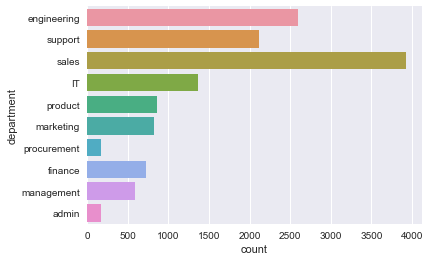

In [65]:
df.department.replace('information_technology','IT', inplace=True)
sns.countplot(y='department',data=df)

In [66]:
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'procurement', 'finance', nan, 'management', 'admin'], dtype=object)

In [68]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [71]:
# Two ways to deal with missing
df.department.fillna('Missing',inplace=True) #df.['department'].fillna('Missing',inplace=True)

df['last_evaluation_missing']=df.last_evaluation.isnull().astype(int)
df.last_evaluation.fillna(0,inplace=True)

df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

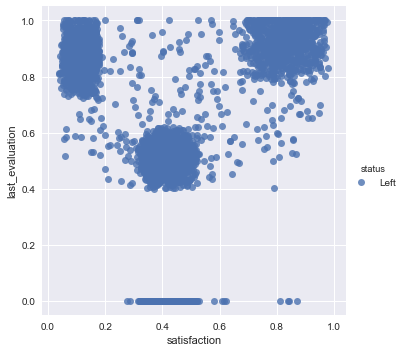

In [72]:
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df[df.status=='Left'],fit_reg=False)

In [74]:
df['underperformer']=((df.last_evaluation<=0.6) & (df.last_evaluation_missing==0)).astype(int)
df['unhappy']=(df.satisfaction<=0.2).astype(int)
df['overachiever']=((df.last_evaluation>=0.8) & (df.satisfaction>=0.7)).astype(int)
df[['underperformer','unhappy','overachiever']].mean()

underperformer    0.381291
unhappy           0.092195
overachiever      0.177069
dtype: float64

In [75]:
df['status']=pd.get_dummies(df.status).Left
df.status.mean()

0.23933750355416547

In [76]:
df=pd.get_dummies(df,columns=['department','salary'])
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [80]:
df.to_csv('analytical_base_table.csv',index=False)

## Classification Algorithms

### REGRESSION

In [80]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

In [83]:
# Scikit-Learn for Modeling
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  #Standardization
from sklearn.model_selection import GridSearchCV  #cv
from sklearn.metrics import roc_curve, auc #Classification

# Pickle for saving model files
import pickle

In [84]:
df=pd.read_csv('analytical_base_table.csv')
df.head(3)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [85]:
raw_df=pd.read_csv("project_files/employee_data.csv")

print(raw_df.status.unique())
raw_df.status.head()
## Binary classification

['Left' 'Employed']


0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

In [86]:
print(df.status.unique())
#df.status.head()

[1 0]


In [87]:
# Split data
y = df.status
X = df.drop('status',axis=1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=1234,
                                                   stratify=df.status)
print(len(X_train),len(X_test),len(y_train),len(y_train))

11254 2814 11254 11254


In [89]:
# Pipeline dictionary
pipelines = {
    'l1' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l1' , random_state=123)),
    'l2' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l2' , random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

In [90]:
# List tuneable hyperparameters of our Logistic pipeline
pipelines['l1'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscal

### L1 & L2 hyperparameter grid

In [91]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}

l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}
#np.linspace(1e-3, 1e3, 10) creates a list of 10 equally spaced values.

### Random forest hyperparameters

In [92]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators':[100,200],
    'randomforestclassifier__max_features':['auto','sqrt',0.33]
}

### Boosted tree hyperparameters

In [93]:
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators':[100,200],
    'gradientboostingclassifier__learning_rate':[0.05,0.1,0.2],
    'gradientboostingclassifier__max_depth':[1,3,5]
}

### Hyperparameters dictionary

In [94]:
# pipeline dictionary
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

## Fit and tune models with cross-validation 
http://scikit-learn.org/stable/modules/classes GridSearchCV

In [31]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model=GridSearchCV(pipeline, hyperparameters[name],cv=10,n_jobs=-1)
    model.fit(X_train,y_train)
    fitted_models[name] = model
    print(name,'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


### Evaluate metrics

In [32]:
for name, model in fitted_models.items():
    print(name, model.best_score_ )

l1 0.844855162609
l2 0.844766305314
rf 0.979118535632
gb 0.975297671939


## ROC curve

In [33]:
from sklearn.metrics import roc_curve,auc

### Confusion matrix

In [35]:
pred = fitted_models['l1'].predict(X_test)
pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[1963  178]
 [ 216  457]]


In [39]:
# predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['l1'].predict_proba(X_test)
pred = [p[1] for p in pred]
pred[:10]

[0.034797150838253535,
 0.0078240183191849236,
 0.0075538721518953311,
 0.06042473438841179,
 0.059396000173643715,
 0.5684667061307076,
 0.11493858973007041,
 0.59539866142771458,
 0.68799107945437032,
 0.18797655588130424]

In [40]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test,pred)

In [41]:
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds}).tail(10)

,FPR,TPR,Thresholds
514,0.766464,0.992571,0.010519
515,0.768800,0.992571,0.010306
516,0.768800,0.994056,0.010289
517,0.810836,0.994056,0.007245
518,0.810836,0.995542,0.007215
519,0.922933,0.995542,0.002296
520,0.922933,0.998514,0.002284
521,0.950490,0.998514,0.001451
522,0.950490,1.000000,0.001450
523,1.000000,1.000000,0.000034


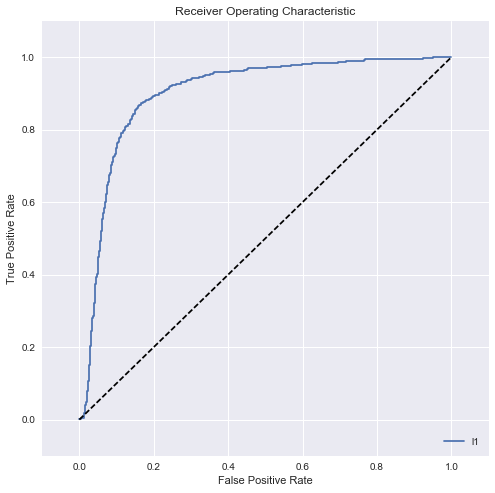

In [42]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Calculate AUROC
print( auc(fpr, tpr) )

0.900942679297


In [44]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print( name, auc(fpr, tpr) )

l1 0.900942679297
l2 0.900944067325
rf 0.992145495883
gb 0.988981832794


In [45]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

# Module 5: Project Delivery

In [46]:
pd.set_option('display.max_columns',100)

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
# load final_model.pkl as model
with open('final_model.pkl','rb') as f:
    model = pickle.load(f)

In [49]:
model

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False))])

In [50]:
# Predict X_test
pred = model.predict_proba(X_test)

# Get just the prediction for the postive class (1)
pred = [p[1] for p in pred]

# Print AUROC (random forest)
print( 'AUROC:', roc_auc_score(y_test, pred) )

AUROC: 0.992145495883


## Write pre-modeling functions

In [68]:
def clean_data(df):
    # Drop duplicates
    df = df.drop_duplicates()
    
    # Drop temporary workers
    df = df[df.department != 'temp']
    
    # Missing filed_complaint values should be 0
    df['filed_complaint'] = df.filed_complaint.fillna(0)

    # Missing recently_promoted values should be 0
    df['recently_promoted'] = df.recently_promoted.fillna(0)
    
    # 'information_technology' should be 'IT'
    df.department.replace('information_technology', 'IT', inplace=True)

    # Fill missing values in department with 'Missing'
    df['department'].fillna('Missing', inplace=True)

    # Indicator variable for missing last_evaluation
    df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)
    
    # Fill missing values in last_evaluation with 0
    df.last_evaluation.fillna(0, inplace=True)
    
    # Return cleaned dataframe
    return df

In [69]:
# Create cleaned_new_data 
cleaned_data = clean_data(raw_data)

# Display first 5 rows
cleaned_data.head()

NameError: name 'raw_data' is not defined

In [70]:
def engineer_features(df):
    # Create indicator features
    df['underperformer'] = ((df.last_evaluation < 0.6) & 
                            (df.last_evaluation_missing == 0)).astype(int)

    df['unhappy'] = (df.satisfaction < 0.2).astype(int)

    df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)
        
    # Create new dataframe with dummy features
    df = pd.get_dummies(df, columns=['department', 'salary'])
    
    # Return augmented DataFrame
    return df

In [71]:
# Create augmented_new_data
augmented_data = engineer_features(cleaned_data)

# Display first 5 rows
augmented_data.head()

NameError: name 'cleaned_data' is not defined

In [72]:
# Predict probabilities
pred = model.predict_proba(augmented_data)

# Print first 5 predictions
print( pred[:5] )

NameError: name 'augmented_data' is not defined